## Assignment 02
For this assignment, we will analyze real estate evaluation dataset from
*Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*

In [504]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
seed=0 # use this random seed throughout your code

### Question 1: Load and visualize the data (15 Points) 
Read the data file `Real_estate_valuation_dataset.csv`: 


In [505]:
# Load the data and take a sneak peek using "head" or "tail" method
data = pd.read_csv("Real_estate_valuation_dataset.csv")
data.head(5)

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


array([[<AxesSubplot:title={'center':'transaction_date'}>,
        <AxesSubplot:title={'center':'house_age'}>,
        <AxesSubplot:title={'center':'distance_to_the_nearest_MRT_station'}>],
       [<AxesSubplot:title={'center':'number_of_convenience_stores'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'house_price_of_unit_area'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

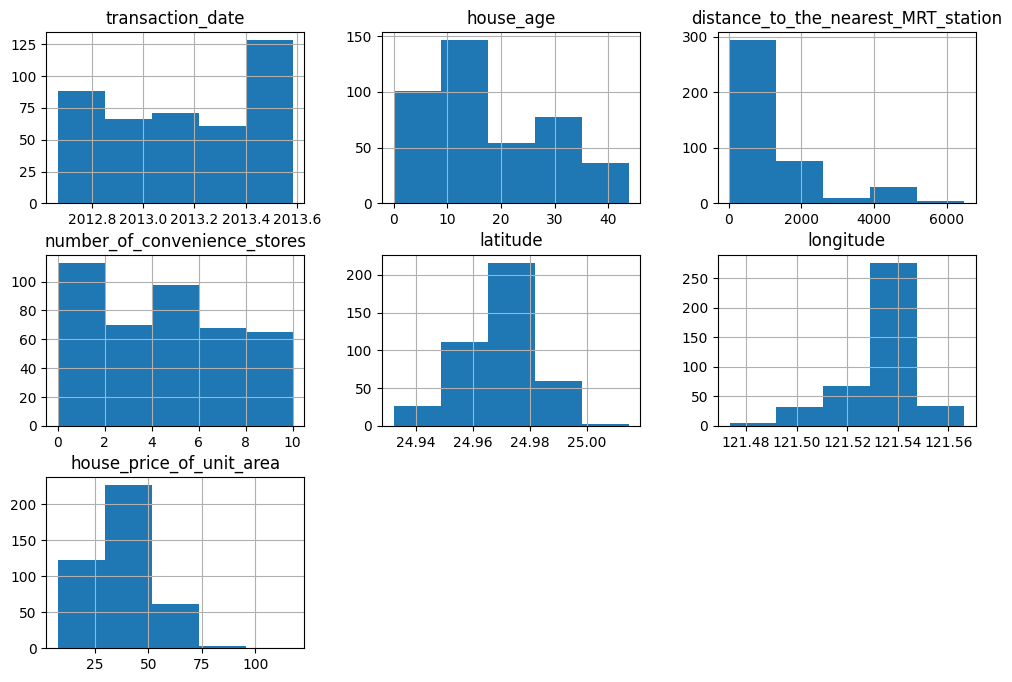

In [506]:
# Use "hist" to plot the distribution of the data, using an appropriate bin size:
data.hist(figsize=(12, 8), bins=5)

In [507]:
# Compute the standard correlation coefficient between every pair of attributes:
corr_matrix = data.corr()
corr_matrix

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
transaction_date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
house_age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_to_the_nearest_MRT_station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
number_of_convenience_stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house_price_of_unit_area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


**Written Answer**: Explain how much each attribute correlates with house_price_of_unit_area?

The feature **latitude, longitude** and **number_of_converience_stores** highly correlates with house_price_of_unit_area among all these variables

The **transaction date** does not correlates to house_price_of_unit_area

The feature **house_age** and **distance_to_the_nearest_MRT_station** negatively correlates with house_price_of_unit_area, **distance_to_the_nearest_MRT_station** exhibit a greater negative correlation.

### Question 2: Simple Linear Regression (30 points)
Let's first examine one feature `distance_to_the_nearest_MRT_station` to see if it can be used to predict `house_price_of_unit_area`:

In [508]:
# Read the corresponding column
y = data['house_price_of_unit_area'].to_numpy()
x = data['distance_to_the_nearest_MRT_station']

# transform x into a design matrix
x = np.c_[np.ones(len(x )), x.to_numpy()]

# Split the data into training and test set with 20% test size and random_state=seed
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

Let's first use LinearRegression from sklearn:

In [509]:
# Because the values of features vary in magnitude, we often
# standardize features by removing the mean and scaling to unit
# variance using sklearn.preprocessing.StandardScaler

# Define the model
model = LinearRegression()

# Fit the model using the training set
model.fit(xtrain, ytrain)

# Obtain intercept and coefficient
intercept = model.intercept_
coefficient = model.coef_
print("Intercept is:", intercept.round(3))
print("Coefficient are:", coefficient.round(3))

# Obtain coefficient of determination (R-squared) on the training data
r2_train = model.score(xtrain, ytrain)
print("Coefficient of determination on the training set: %.3f" % r2_train)

# Make predictions using the testing set
ypred = model.predict(xtest)

# Evaluate performance on the test data
r2_test = r2_score(ytest, ypred)
print("Coefficient of determination on the test set: %.3f" % r2_test)

Intercept is: 46.243
Coefficient are: [ 0.    -0.007]
Coefficient of determination on the training set: 0.432
Coefficient of determination on the test set: 0.539


**Written Answer**: Based on the R-squared of training and test set, will it be better to use regularized regression?


Text(0.5, 1.0, 'test data and predicted data')

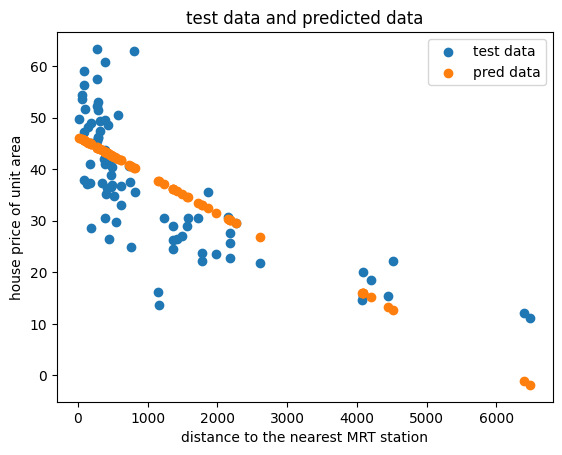

In [510]:
# Plot test data and predicted data
plt.scatter(xtest[:,1], ytest)
plt.scatter(xtest[:,1], ypred)
plt.legend(['test data', 'pred data'])
plt.xlabel('distance to the nearest MRT station')
plt.ylabel('house price of unit area')
plt.title("test data and predicted data")

In [511]:
# Define a function to plot learning curves based on R-squared:
def plot_learning_curves_R2(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(2, len(X_train) + 1):

        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        if (m == 1):
            train_errors.append(r2_score(y_train_predict.reshape(-1, 1), y_train[:m].reshape(-1, 1)))
        else:
            train_errors.append(model.score(X_train[:m], y_train[:m]))

        val_errors.append(r2_score(y_val, y_val_predict))

    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("R-squared score", fontsize=14) 

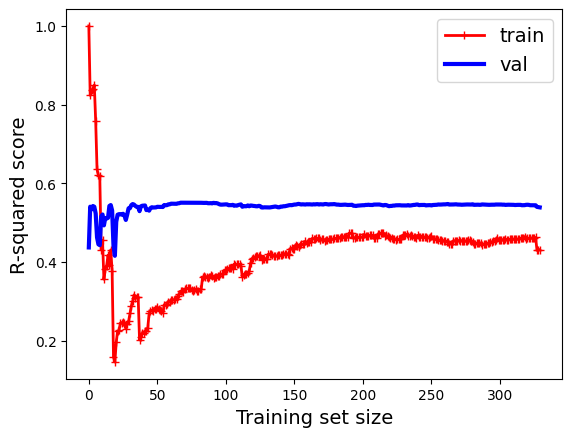

In [512]:
# Use the function defined above to plot the learning curves of your model
plot_learning_curves_R2(model, x, y)
plt.show()

**Written Answer**: Explain how do you interpret the learning curves you just plotted?

In the first few samples, the training score is higher than the test score, which means a overfitting occurs.

Then the training learning curves keep decreaseing and then increasing, which means the model is keep fitting the data to get a better result.

However, the val learning curve is still higher than the train learning curve, the model seems to be converged

### Question 3: Multivariate Linear Regression (30 Points)

We just used only one feature to predict house price. But sometimes using more features can better predict the target variable. 

Here, let's examine another two features: latitude and longitude. These two variables together give information about the location, that should be related to house price:

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

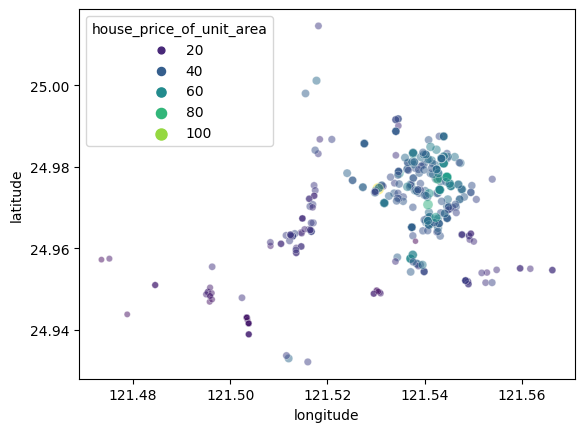

In [513]:
# Let's visualize it using sns scatterplot
sns.scatterplot(data=data, x="longitude", y="latitude",
                size="house_price_of_unit_area", hue="house_price_of_unit_area",
                palette="viridis", alpha=0.5)

In [514]:
# Read the corresponding column
y = data['house_price_of_unit_area'].to_numpy()
longitude = data['longitude']
latitude = data['latitude']
# Create a design matrix
x = np.c_[np.ones(len(x)), data[['longitude', 'latitude']].to_numpy()]

# Split the data into training and test set with 20% test size and random_state=seed
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

Let's use linear regression again:

In [515]:
# Define the model
model = LinearRegression()

# Fit the model using the training set
model.fit(xtrain, ytrain)

# Obtain intercept and coefficient
intercept = model.intercept_
coefficient = model.coef_
print("Intercept is:", intercept.round(3))
print("Coefficient are:", coefficient.round(3))

# Obtain coefficient of determination on the training data
r2_train = model.score(xtrain, ytrain)
print("Coefficient of determination on the training set: %.3f" % r2_train)

# Make predictions using the testing set
ypred = model.predict(xtest)

# Evaluate performance on the test data
r2_test = r2_score(ytest, ypred)
print("Coefficient of determination on the test set: %.3f" % r2_test)

Intercept is: -48631.61
Coefficient are: [  0.    310.612 437.342]
Coefficient of determination on the training set: 0.379
Coefficient of determination on the test set: 0.511


Use the "plot_learning_curves" function to plot the learning curves of your model:

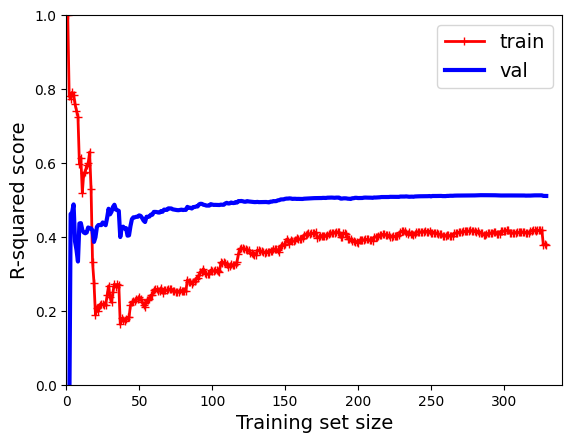

In [516]:
plot_learning_curves_R2(model, x, y)
plt.axis([0, 340, 0, 1])
plt.show()

**Written Answer**: Compare this learning curve against the previous one. What insights you can derive by this comparison?

This curve has lesser traning score and testing score, hence the combination of these two feature is not good as the previous one.

Let's use stochastic gradient descent with initial learning rate of 0.01:

In [517]:
# Define the model
sgd_reg =  SGDRegressor(eta0=0.01, random_state=42, max_iter=10000)
pipe = make_pipeline(StandardScaler(), sgd_reg)

# Fit the model using the training set
pipe.fit(xtrain, ytrain)

# Obtain intercept and coefficient
intercept = sgd_reg.intercept_
coefficient = sgd_reg.coef_
print("Intercept is:", intercept.round(3))
print("Coefficient are:", coefficient.round(3))

# Obtain coefficient of determination on the training data
r2_train = pipe.score(xtrain, ytrain)
print("Coefficient of determination on the training set: %.3f" % r2_train)

# Make predictions using the testing set
ypred = pipe.predict(xtest)

# Evaluate performance on the test data
r2_test = r2_score(ytest, ypred)
print("Coefficient of determination on the test set: %.3f" % r2_test)

Intercept is: [38.38]
Coefficient are: [0.    4.643 5.463]
Coefficient of determination on the training set: 0.379
Coefficient of determination on the test set: 0.511


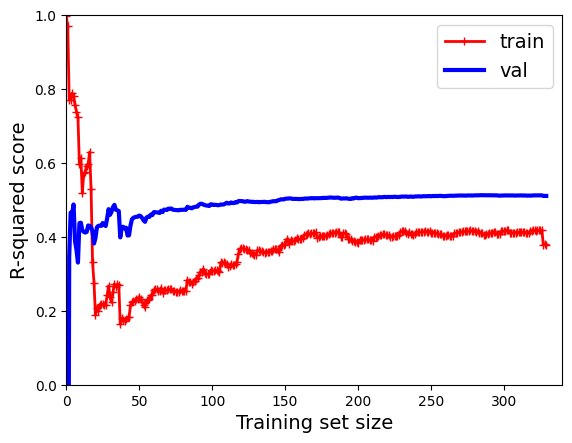

In [518]:
# Use the "plot_learning_curves" function to plot the learning curves of your model:
plot_learning_curves_R2(pipe, x, y)
plt.axis([0, 340, 0, 1])
plt.show()

**Written Answer:** Compare the scores and learning curves of the SGD regression versus the linear regression. Are the learning curves similar or different and why? Also compare and explain why their values for Intercept and Coefficient are a little bit different?
(Hint: Check and compare default arguments and cost functions for both methods)

The learning curves are similar. This is because the training process of SGD regression is similiar to linear regression.

The Intercept and Coefficient are very different. This is because we use a StandardScaler layer before the sgd regression model. 


### Question 4: Feature Selection (25 Points)
Now, let's use all available features to predict house price:

In [519]:
x = data.drop('house_price_of_unit_area', axis=1)
x = np.c_[np.ones(len(x)), x.to_numpy()]
y = data['house_price_of_unit_area'].to_numpy()


In [520]:
# Create the design matrix
x = data.drop('house_price_of_unit_area', axis=1)
x = np.c_[np.ones(len(x)), x.to_numpy()]
y = data['house_price_of_unit_area'].to_numpy()

# Split the data into training and test set with 20% test size and random_state=0
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

Let's use Ridge regression with alpha=0.01:

In [521]:
# Define the model
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)

# Fit the model using the training set
ridge_reg.fit(x, y)

# Obtain intercept and coefficient
intercept = ridge_reg.intercept_
coefficient = ridge_reg.coef_
print("Intercept is:", intercept.round(3))
print("Coefficient are:", coefficient.round(3))

# Obtain coefficient of determination on the training data
r2_train = r2_score(ytrain, ridge_reg.predict(xtrain))
print("Coefficient of determination on the training set: %.3f" % r2_train)

# Make predictions using the testing set
ypred =  ridge_reg.predict(xtest)

# Evaluate performance on the test data
r2_test = r2_score(ytest, ypred)
print("Coefficient of determination on the test set: %.3f" % r2_test)

Intercept is: -11250.042
Coefficient are: [ 0.000e+00  5.583e+00 -2.550e-01 -5.000e-03  1.253e+00  8.760e+00
 -1.356e+00]
Coefficient of determination on the training set: 0.538
Coefficient of determination on the test set: 0.640


Index(['transaction_date', 'house_age', 'distance_to_the_nearest_MRT_station',
       'number_of_convenience_stores', 'latitude'],
      dtype='object')


Text(0.5, 0, 'Coefficient')

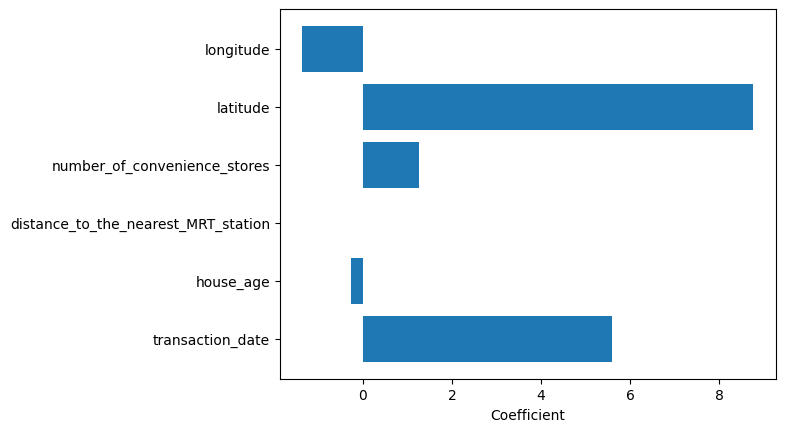

In [522]:
# Using plot.barh to plot the value of coefficent

# Select coefficient expect for the first bias one
coefficient_feature = coefficient[1:]

# Get the names of features
features_name = data.columns[:-1]

print(features_name[:-1])
# Plot
plt.barh(features_name, coefficient_feature)
plt.xlabel('Coefficient')

**Written Answer:** How do you interpret the result? How can it help you to select features to predict price? How does this result compare against the insights that you derived form the correlation matrix in Question 1?

The house_age and longitude has negative coefficient, the distance_to_the_nearest_MRT_station has zero coefficient and other three has positive coefficient. The larger coefficient means the model depends on this feature more to predict the true value.

This can help me to select features with higher coefficient to better predict the price.

The correlation matrix in Question 1 says longitude is positive correlate to the house_price_per_unit, distance_to_the_nearest_MRT_station has large negative correlation to the house_price_per_unit and the transaction date has small correlation to house_price_per_unit.

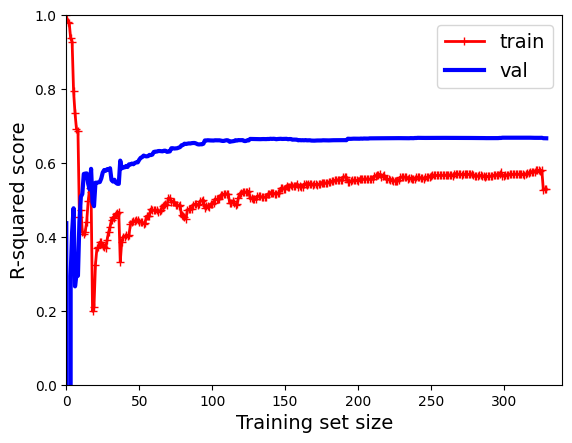

In [523]:
# Use the "plot_learning_curves" function to plot the learning curves of your model:
plot_learning_curves_R2(ridge_reg, x, y)
plt.axis([0, 340, 0, 1])
plt.show()

**Written Answer:** How this learning curve compares against the rest of the learning curves? Based on the learning curves, what model and size of training set would you choose as your final model?

This model has traing score = 0.538 and test score = 0.640, sgd model has traing score = 0.379 and test score = 0.511, linear regression has traing score = 0.432 and test score = 0.539

Hence based on learning curve, I will choose the ridge regression model and set the training set size as 200.

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  You will submit to OWL only one file, which is your completed notebook (.ipynb file extension).